# Table of Contents
 <p><div class="lev1 toc-item"><a href="#User-story" data-toc-modified-id="User-story-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>User story</a></div><div class="lev1 toc-item"><a href="#Dataset-creation:" data-toc-modified-id="Dataset-creation:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset creation:</a></div><div class="lev2 toc-item"><a href="#Example-dataset-we-are-working-with:" data-toc-modified-id="Example-dataset-we-are-working-with:-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example dataset we are working with:</a></div><div class="lev1 toc-item"><a href="#Queries-availables-through-the-query-api" data-toc-modified-id="Queries-availables-through-the-query-api-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Queries availables through the query api</a></div><div class="lev2 toc-item"><a href="#selected-point-table-view-of-all-variables-columns-" data-toc-modified-id="selected-point-table-view-of-all-variables-columns--31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Selected point table view of all variables (columns)</a></div><div class="lev2 toc-item"><a href="#selected-point-table-view-of-selected-columns-filtering-by-date" data-toc-modified-id="selected-point-table-view-of-selected-columns-filtering-by-date-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Selected point table view of selected columns filtering by date</a></div><div class="lev2 toc-item"><a href="#selected-point-min-and-max-year-available" data-toc-modified-id="selected-point-min-and-max-year-available-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Selected point min and max year available</a></div><div class="lev2 toc-item"><a href="#selected-point-agg-statistics-for-selected-columns" data-toc-modified-id="selected-point-agg-statistics-for-selected-columns-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Selected point agg statistics for selected columns</a></div><div class="lev2 toc-item"><a href="#histograms-range-of-years" data-toc-modified-id="histograms-range-of-years-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Histograms: range of years</a></div>

In [1]:
import requests
import json
import pandas as pd 
from pprint import pprint
from IPython.display import display, Markdown, HTML
import matplotlib.pyplot as plt
from numpy import arange

In [17]:
prod_env= 'https://api.resourcewatch.org'
staging_env='https://staging-api.globalforestwatch.org'
api_post= prod_env + '/v1/{endpoint}'
api_baseurl= prod_env + '/v1/{endpoint}/{dataset_id}'

def query(sql, dataset_id, geostore):
    display(Markdown(">#### Sql applied:  "))
    display(Markdown(">>```sql {0}  ```".format(sql)))
    payload = {"sql": sql,
              "geostore": geostore,
              "geoagg": "max"}
    r = requests.get(api_baseurl.format(endpoint='query',dataset_id=dataset_id), params=payload)
    if r.status_code != 200:
        return print(r.json())
    else:
        return pd.read_json(json.dumps(r.json()['data']), orient='records')

# User story

#### Dataset creation
* User should be able to create nexgddp datasets - as many as needed. (different time aggregation level, scenarios and models)

#### Widget editor:  
* User should be able to select a point in space (latitude + longitude). In the future we will allow to select a bounding box (in which case user needs to select the type of aggregation)
* User can filter the range of years from the available years. Available years will be implemented in the /fields response
* User can select type of chart (line or bar) and display it. Years should be ordered asc by default
* User has the Category, Value and Filters option (no order, no limit). 
* User can save the widget and embed it elsewhere

****Once Bounding Box selection is implemented:*** User can select different aggregation functions over the original data: avg, min, max, std, plus st_histogram and temporal series.

#### Layers creation, edition and visualization.
* Layer definition:
    - Users should be able to choose an indicator, a year or a set of precalculated temporal agregations like temperature change in the last 20 years or the average precipitation expected under rcp45 scenario in the period 2020-2050.
    - Users should be able to style their layers; Changing coloring ramp and values.
 
* Layer Creation and visualization
    - Define layer config so users are able to add it to the layer creation step in the backoffice.
    - Tilelive for visualizing it so users can see them: https://api.resourcewatch.org/v1/layer/<layer_id>/tile/nexgddp/{z}/{x}/{y} 
    - Add the new specification in the front so users are able to visualize the layer in the explore pages of prep and rw
* Add interactivity so users are able to click on any part of the map an get back and infowindow with the value of the point selected.


*[Source document](https://docs.google.com/document/d/1psuVjlVYmgUx7ba_1B9aUw5VuNtP3zp8dERPgExV098/edit?ts=59c0e980)*

# Dataset creation:

```json
{
    "connectorType":"rest",
    "provider":"nexgddp",
    "tableName": "historical/ACCESS1_0"
    "application":[
     "rw"
    ],
    "name":"Nexgddp"
    ...
}
```
Dataset aggregated by year. The table name will be the `<scenario/model>` all in lowercase and `_` istead of `-`.  
F.E: `historical/access1_0`

### List of scenarios
* historical
* rcp45
* rcp85

### List of models available
* ACCESS1-0 
* CSIRO-MK3-6-0 
* MIROC-ESM
* BCC-CSM1-1 
* GFDL-CM3 
* MIROC-ESM-CHEM
* BNU-ESM 
* GFDL-ESM2G 
* MIROC5
* CanESM2 
* GFDL-ESM2M 
* MPI-ESM-LR
* CCSM4 
* INMCM4 
* MPI-ESM-MR
* CESM1-BGC 
* IPSL-CM5A-LR 
* MRI-CGCM3
* CNRM-CM5 
* IPSL-CM5A-MR 
* NorESM1-M


### Columns description

|column name| name| units|
|---|                                            ---|---|
|tmax| Daily maximum temperature                    | K|  
|tmin| Daily minimum temperature                    | K|  
|tavg| Daily average temperature                    | K|  
|tmax90F| Annual number of days > 90F               | Days|  
|tmax95F| Annual number of days > 95F               | Days|  
|tmax100F| Annual number of days > 100F             | Days|  
|icing_days| Annual number of icing days            | Days|  
|frost_days| Annual number of frost days            | Days|  
|pr2in| Annual number of days > 2 inches            | Days|  
|pr3in| Annual number of days > 3 inches            | Days|  
|pr4in| Annual number of days > 4 inches            | Days|  
|tmax5day| Annual highest 5-day maximum temperature | F|  
|tmin5day| Annual lowest 5-day minimum temperature  | F|  
|tmax99p| Threshold tmax value for 99th percentile  | K|  
|tmax1p| Threshold tmax value for 1st percentile    | K|  
|tmin99p| Threshold tmin value for 99th percentile  | K|  
|tmin1p| Threshold tmin value for 1st percentile    | K|  
|pr99p| Threshold pr value for 99th percentile      | K|  
|pr1p| Threshold pr value for 1st percentile        | K|  
|prmax1day| Annual maximum 1-day precipitation      | mm|  
|cdd| Cooling degree days                           | F|  
|hdd| Heating degree days                           | F|  


## Example dataset we are working with:

In [13]:
dataset_id='5e11f2ae-77e8-4f1a-bd28-ad9e4ec97f01'
geojson={"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"Point","coordinates":[-3.6749267578125,40.43858586704331]}}]}

r = requests.get(api_baseurl.format(endpoint='dataset',dataset_id=dataset_id))
pprint(r.json())    

{'data': {'attributes': {'application': ['prep', 'rw'],
                         'attributesPath': None,
                         'blockchain': {},
                         'clonedHost': {},
                         'connectorType': 'rest',
                         'connectorUrl': '',
                         'dataPath': None,
                         'env': 'production',
                         'errorMessage': None,
                         'geoInfo': True,
                         'layerRelevantProps': [],
                         'legend': {'country': [], 'date': [], 'region': []},
                         'name': 'nexgddp-historical-ACCESS1_0',
                         'overwrite': False,
                         'provider': 'nexgddp',
                         'published': True,
                         'slug': 'nexgddp-historical-ACCESS1_0',
                         'status': 'saved',
                         'subtitle': None,
                         'tableName': 'historical/ACC

In [14]:
payload = {"geojson":geojson}
r = requests.post(api_post.format(endpoint='geostore'),json=payload)
geostore=r.json()['data']['id']

display(Markdown("""> #### Geojson to display:  

>> ```json 
{0} 
```""".format(geojson)))
display(Markdown("> ### Geostore creation:  "))
pprint(r.json())

> #### Geojson to display:  

>> ```json 
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-3.6749267578125, 40.43858586704331]}}]} 
```

> ### Geostore creation:  

{'data': {'attributes': {'areaHa': 0,
                         'bbox': [-3.6749267578125,
                                  40.43858586704331,
                                  -3.6749267578125,
                                  40.43858586704331],
                         'geojson': {'crs': {},
                                     'features': [{'geometry': {'coordinates': [-3.6749267578125,
                                                                                40.43858586704331],
                                                                'type': 'Point'},
                                                   'type': 'Feature'}],
                                     'type': 'FeatureCollection'},
                         'hash': 'e669023a10c35364e0b1780c181bd06b',
                         'lock': False,
                         'provider': {}},
          'id': 'e669023a10c35364e0b1780c181bd06b',
          'type': 'geoStore'}}


In [15]:
r = requests.get(api_baseurl.format(endpoint='fields',dataset_id=dataset_id))
display(Markdown("> ### Dataset fields metadata: "))
pprint(r.json())

> ### Dataset fields metadata: 

{'fields': {'cdd': {'type': 'number', 'uom': '10^0'},
            'cwd': {'type': 'number', 'uom': '10^0'},
            'frost_days': {'type': 'number', 'uom': '10^0'},
            'icing_days': {'type': 'number', 'uom': '10^0'},
            'pr1p': {'type': 'number', 'uom': '10^0'},
            'pr2in': {'type': 'number', 'uom': '10^0'},
            'pr3in': {'type': 'number', 'uom': '10^0'},
            'pr4in': {'type': 'number', 'uom': '10^0'},
            'pr99p': {'type': 'number', 'uom': '10^0'},
            'prmaxday': {'type': 'number', 'uom': '10^0'},
            'tmax100F': {'type': 'number', 'uom': '10^0'},
            'tmax1p': {'type': 'number', 'uom': '10^0'},
            'tmax5day': {'type': 'number', 'uom': '10^0'},
            'tmax90F': {'type': 'number', 'uom': '10^0'},
            'tmax95F': {'type': 'number', 'uom': '10^0'},
            'tmax99p': {'type': 'number', 'uom': '10^0'},
            'tmin1p': {'type': 'number', 'uom': '10^0'},
            'tmin5day': {'

In [16]:
r = requests.get(api_baseurl.format(endpoint='geostore',dataset_id=geostore))
display(Markdown("> ### Geostore"))
pprint(r.json())

> ### Geostore

{'data': {'attributes': {'areaHa': 0,
                         'bbox': [-3.6749267578125,
                                  40.43858586704331,
                                  -3.6749267578125,
                                  40.43858586704331],
                         'geojson': {'crs': {},
                                     'features': [{'geometry': {'coordinates': [-3.6749267578125,
                                                                                40.43858586704331],
                                                                'type': 'Point'},
                                                   'type': 'Feature'}],
                                     'type': 'FeatureCollection'},
                         'hash': 'e669023a10c35364e0b1780c181bd06b',
                         'lock': False,
                         'provider': {}},
          'id': 'e669023a10c35364e0b1780c181bd06b',
          'type': 'geoStore'}}


# Queries availables through the query api

It is mandatory to send a geostore representing a point (in the future also bbox will be allowed to evaluate a region of interest).  
In order to test it we are going to use the next geostore code: `e669023a10c35364e0b1780c181bd06b`

In [30]:
display(Markdown("> ## Selected point table view of all variables (columns)"))
sql = '''
select * from nexgddp-historical-ACCESS1_0
'''
dataset = query(sql, dataset_id, geostore)
display(dataset.head(6))
#display(Markdown("> ### Visual"))
#display(dataset.plot.bar(x='x',y='y',figsize=(10, 10)));

> ## Selected point table view of all variables (columns)

>#### Sql applied:  

>>```sql 
select * from nexgddp-historical-ACCESS1_0
  ```

,cdd,cwd,frost_days,icing_days,pr1p,pr2in,pr3in,pr4in,pr99p,prmaxday,tmax100F,tmax1p,tmax5day,tmax90F,tmax95F,tmax99p,tmin1p,tmin5day,tmin99p,year
0,44,24,0,0,0,2,0,0,0.000450,70.5369,0,301.399,307.361,77,0,307.344,292.648,297.358,297.521,1950
1,16,28,0,0,0,0,0,0,0.000293,44.4796,0,300.916,307.234,104,0,307.230,293.458,297.741,297.891,1951
2,19,28,0,0,0,0,0,0,0.000261,25.7500,0,300.583,307.375,112,0,307.340,293.156,297.235,297.486,1952
3,20,35,0,0,0,1,1,0,0.000389,83.7281,0,299.218,307.470,52,0,307.293,291.349,297.731,297.713,1953
4,15,27,0,0,0,0,0,0,0.000334,32.4476,0,298.573,306.799,57,0,306.737,290.550,296.996,297.089,1954
5,28,36,0,0,0,1,0,0,0.000226,58.4660,0,300.649,307.198,93,0,307.136,291.851,298.121,298.034,1955


In [40]:
display(Markdown("> ## Selected point table view of selected columns filtering by date"))
sql = '''
SELECT year as x, tmax99p as y FROM historical/ACCESS1_0 LIMIT 500
'''
dataset = query(sql, dataset_id, geostore)
display(dataset.head(6))
display(Markdown("> ### Visual"))

> ## Selected point table view of selected columns filtering by date

>#### Sql applied:  

>>```sql 
SELECT year as x, tmax99p as y FROM historical/ACCESS1_0 LIMIT 500
  ```

,x,y
0,1950-01-01T00:00:00,307.344
1,1951-01-01T00:00:00,307.230
2,1952-01-01T00:00:00,307.340
3,1953-01-01T00:00:00,307.293
4,1954-01-01T00:00:00,306.737
5,1955-01-01T00:00:00,307.136


> ### Visual

<IPython.core.display.Javascript object>


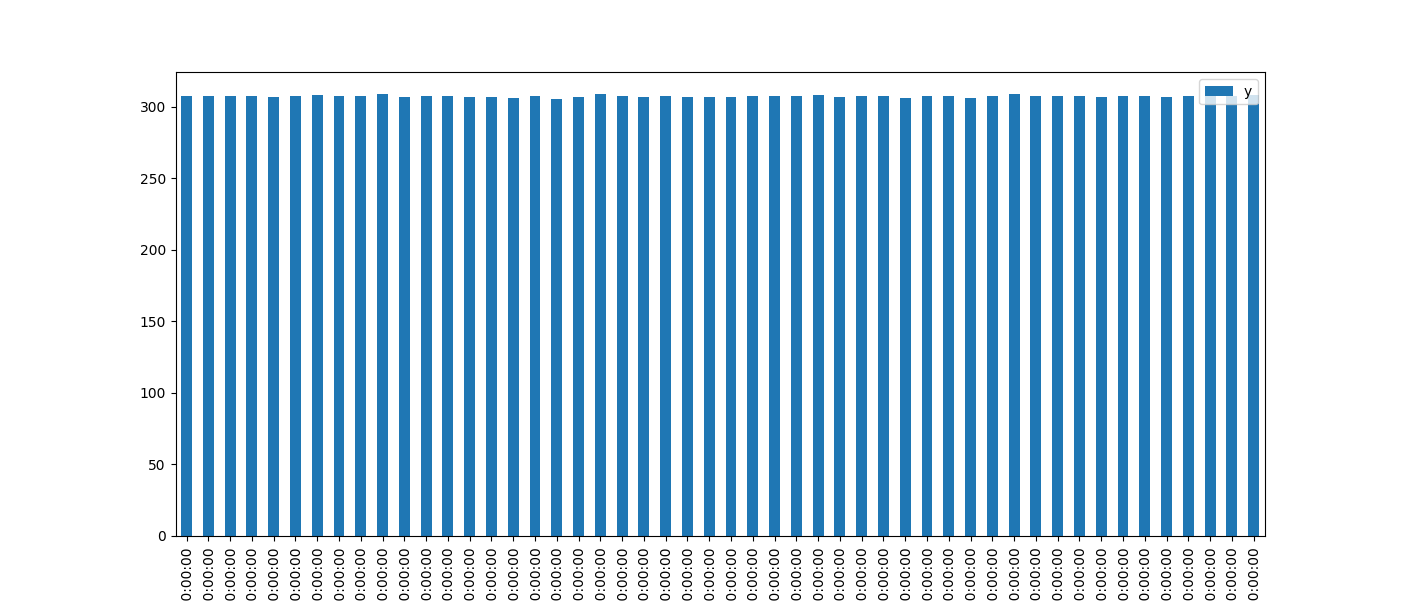

In [41]:
dataset.plot.bar(x='x',y='y',figsize=(6, 6));

In [39]:
display(Markdown("> ## Selected point min and max year available"))
sql = '''
Select max(year) as max, min(year) as min from from nexgddp-historical-ACCESS1_0
'''
dataset = query(sql, dataset_id, None)
display(dataset.head(6))
#display(Markdown("> ### Visual"))
#display(dataset.plot.bar(x='x',y='y',figsize=(10, 10)));

> ## Selected point min and max year available

>#### Sql applied:  

>>```sql 
Select max(year) as max, min(year) as min from from nexgddp-historical-ACCESS1_0
  ```

,max(year),min(year)
0,1999-01-01T00:00:00+00:00,1950-01-01T00:00:00+00:00


In [29]:
display(Markdown("> ## Selected point agg statistics for selected columns"))
display(Markdown(""">  Available aggregation functions:
* `avg(<column>)`
* `min(<column>)`
* `max(<column>)`
* `std(<column>)` 

> ***`Group by <column>`  operation is not currently available*
"""))
sql = '''
Select avg(prmaxday) from nexgddp-historical-ACCESS1_0 where year between 1950 and 1955
'''
dataset = query(sql, dataset_id, geostore)
display(dataset.head(6))
#display(Markdown("> ### Visual"))
#display(dataset.plot.bar(x='x',y='y',figsize=(10, 10)));

> ## Selected point agg statistics for selected columns

>  Available aggregation functions:
* `avg(<column>)`
* `min(<column>)`
* `max(<column>)`
* `std(<column>)` 

> ***`Group by <column>`  operation is not currently available*


>#### Sql applied:  

>>```sql 
Select avg(prmaxday) from nexgddp-historical-ACCESS1_0 where year between 1950 and 1955
  ```

,avg(prmaxday)
0,52.568


In [25]:
display(Markdown("> ## Histograms: range of years"))
display(Markdown("> **disclaimer: this will only make sesnse for bbox"))

payload = {"geojson":{"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-4.4000244140625,40.14109012528468],[-2.955322265625,40.14109012528468],[-2.955322265625,40.65563874006118],[-4.4000244140625,40.65563874006118],[-4.4000244140625,40.14109012528468]]]}}]}}
r = requests.post(api_post.format(endpoint='geostore'),json=payload)
geostore=r.json()['data']['id']

display(Markdown("""> #### Geojson to display:  

>> ```json 
{0} 
```""".format(geojson)))
display(Markdown("> ### Geostore creation:  "))

sql = '''
Select st_histogram(prmaxday) from nexgddp-historical-ACCESS1_0 where year between 1950 and 1952
'''
dataset = query(sql, dataset_id, geostore)
display(dataset.head(6))

> ## Histograms: range of years

> **disclaimer: this will only make sesnse for bbox

> #### Geojson to display:  

>> ```json 
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {}, 'geometry': {'type': 'Point', 'coordinates': [-3.6749267578125, 40.43858586704331]}}]} 
```

> ### Geostore creation:  

>#### Sql applied:  

>>```sql 
Select st_histogram(prmaxday) from nexgddp-historical-ACCESS1_0 where year between 1950 and 1952
  ```

{'errors': [{'detail': 'Internal Server Error', 'status': 500}]}


AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
display(Markdown("> ## Histograms: select one year"))
sql = '''
Select st_histogram(prmaxday) from nexgddp-historical-ACCESS1_0 where year=1998
'''
dataset = query(sql, dataset_id, geostore)
display(dataset.head(6))
display(Markdown("> ### Visual"))
steps = (dataset['max'][0]-dataset['min'][0])/dataset['buckets'][0]
print(dataset['min'][0], dataset['max'][0],steps)

In [ ]:
plt.plot(arange(dataset['min'][0], dataset['max'][0],steps),dataset['st_histogram'][0])
plt.show()

### Nexgddp layers 